<a href="https://colab.research.google.com/github/Park-New-project/TIL/blob/main/%5BAI%5D_221017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도학습 XOR


In [ ]:
from sklearn import svm

In [ ]:
# 1. 데이터 준비
xor_data = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
xor_data

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [ ]:
# 데이터 분리 (학습 데이터, 레이블)
train_data = []
label = []

for row in xor_data:
    p = row[0]
    q = row[1]
    res = row[2]
    train_data.append([p,q])
    label.append(res)

print(train_data)
print(label)

[[0, 0], [0, 1], [1, 0], [1, 1]]
[0, 1, 1, 0]


In [ ]:
# 2. 모델의 표현 방법
clf = svm.SVC()
clf

SVC()

In [ ]:
clf.fit(train_data, label) # 기계 학습

SVC()

In [ ]:
y_pred = clf.predict(train_data)
y_pred

array([0, 1, 1, 0])

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
# 3. 모델 평가
ok = total = 0

for idx, answer in enumerate(label):
    print(idx," ", answer)

    p = y_pred[idx]

    if p==answer:
        ok += 1
    total += 1

print("ok: ",ok)
print("total: ", total)
print("정확도: ", ok/total)

0   0
1   1
2   1
3   0
ok:  4
total:  4
정확도:  1.0


# 지도학습 XOR 판다스


In [ ]:
# 1. 데이터 준비
xor_data = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
xor_data

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [ ]:
import pandas as pd
from sklearn import svm, metrics

In [ ]:
df_xor = pd.DataFrame(xor_data)
df_xor

,0,1,2
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [ ]:
train_data = df_xor.loc[:,0:1]
train_data

,0,1
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
type(train_data)

pandas.core.frame.DataFrame

In [ ]:
label = df_xor.loc[:,2]
label

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [ ]:
type(label)

pandas.core.series.Series

In [ ]:
# 2. 모델의 표현 방법
clf = svm.SVC()
clf

SVC()

In [ ]:
clf.fit(train_data, label) # 기계 학습
clf

SVC()

In [ ]:
# 3. 모델 평가
y_pred = clf.predict(train_data)
y_pred

array([0, 1, 1, 0])

In [ ]:
acc = metrics.accuracy_score(label, y_pred)
print("정확도", acc)

정확도 1.0


# 행렬

In [ ]:
import numpy as np

In [ ]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
np.eye(4, k=1, dtype=int)

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [ ]:
x= np.arange(9).reshape(3,3)

In [ ]:
np.diag(x)

array([0, 4, 8])

In [ ]:
np.diag(x, k=1)

array([1, 5])

In [ ]:
np.diag(np.diag(x))

array([[0, 0, 0],
       [0, 4, 0],
       [0, 0, 8]])

In [ ]:
from scipy import sparse

In [ ]:
b1 = np.eye(4, dtype=int)
b1

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [ ]:
sm1 = sparse.csr_matrix(b1)
sm1

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
print("CSR 행렬 : {}".format(sm1)) # 좌표를 가져옴

CSR 행렬 :   (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1


In [ ]:
b2 = np.eye(5, k=-1, dtype=int)
b2

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
sm2 = sparse.csr_matrix(b2)
sm2

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [ ]:
print("CSR 행렬 : {}".format(sm2)) # 좌표를 가져옴

CSR 행렬 :   (1, 0)	1
  (2, 1)	1
  (3, 2)	1
  (4, 3)	1


In [ ]:
b3 = np.arange(16).reshape(4,4)
b3

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
y = np.diag(np.diag(b3))
y

array([[ 0,  0,  0,  0],
       [ 0,  5,  0,  0],
       [ 0,  0, 10,  0],
       [ 0,  0,  0, 15]])

In [ ]:
sm3 = sparse.csr_matrix(y)
sm3

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
print("CSR 행렬 : {}".format(sm3)) # 좌표를 가져옴

CSR 행렬 :   (1, 1)	5
  (2, 2)	10
  (3, 3)	15


In [ ]:
data = np.ones(4)
data

array([1., 1., 1., 1.])

In [ ]:
row = np.arange(4)
row

array([0, 1, 2, 3])

In [ ]:
col = np.arange(4)
col

array([0, 1, 2, 3])

In [ ]:
eye = sparse.coo_matrix((data, (row, col)))
eye

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in COOrdinate format>

In [ ]:
print("{}".format(eye))

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
np.arange(4)

array([0, 1, 2, 3])

In [ ]:
np.arange(0,6,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9])

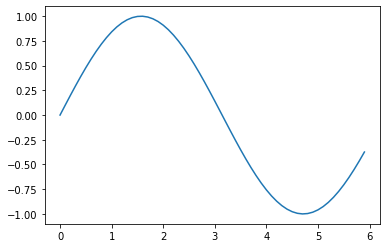

In [ ]:
x = np.arange(0,6,0.1)
y = np.sin(x)

plt.plot(x,y)
plt.show()

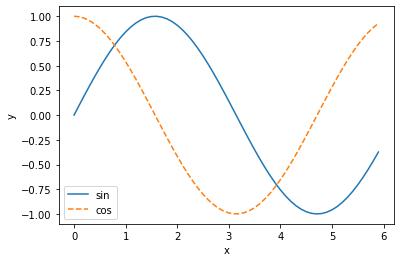

In [ ]:
x = np.arange(0,6,0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1, label="sin")
plt.plot(x,y2, ls="--", label="cos")

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

# datasets

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
irisData = load_iris()
irisData

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
irisData['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
irisData['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
irisData['data'].shape

(150, 4)

In [ ]:
type(irisData['data'])

numpy.ndarray

In [ ]:
irisData.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
irisData['target'].shape

(150,)

In [ ]:
irisData['data'].shape

(150, 4)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(irisData['data'],
                                                    irisData['target'],
                                                    random_state=0)

In [ ]:
X_train.shape

(112, 4)

In [ ]:
X_test.shape

(38, 4)

In [ ]:
Y_train.shape

(112,)

In [ ]:
Y_test.shape

(38,)